In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [4]:
# Load the dataset from local path
trainPath = r"D:\Work\python\dl_clg\datasets\fashion\fashion-mnist_train.csv"
data = pd.read_csv(trainPath)

In [10]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data['label'].values
x = data.drop(columns=['label']).values

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [28]:
y = to_categorical(y)
x = x.reshape(-1,28,28,1)/255.0

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=.25)

In [30]:
model = Sequential([
    Conv2D(28, (3,3) , activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(62, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') # 10 classes of dataset
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(x_train,y_train, epochs=10, batch_size=64 , validation_data=(x_test , y_test))

Epoch 1/10
704/704 [==============================] - 13s 18ms/step - loss: 0.2874 - accuracy: 0.8969 - val_loss: 0.2726 - val_accuracy: 0.9022
Epoch 2/10
704/704 [==============================] - 12s 18ms/step - loss: 0.2737 - accuracy: 0.9001 - val_loss: 0.2759 - val_accuracy: 0.8993
Epoch 3/10
704/704 [==============================] - 14s 20ms/step - loss: 0.2581 - accuracy: 0.9058 - val_loss: 0.2603 - val_accuracy: 0.9043
Epoch 4/10
704/704 [==============================] - 14s 20ms/step - loss: 0.2466 - accuracy: 0.9108 - val_loss: 0.2558 - val_accuracy: 0.9087
Epoch 5/10
704/704 [==============================] - 13s 19ms/step - loss: 0.2337 - accuracy: 0.9141 - val_loss: 0.2597 - val_accuracy: 0.9077
Epoch 6/10
704/704 [==============================] - 14s 20ms/step - loss: 0.2226 - accuracy: 0.9182 - val_loss: 0.2571 - val_accuracy: 0.9077
Epoch 7/10
704/704 [==============================] - 14s 19ms/step - loss: 0.2140 - accuracy: 0.9197 - val_loss: 0.2617 - val_accuracy:

In [33]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


469/469 [==============================] - 2s 4ms/step - loss: 0.2708 - accuracy: 0.9035
Test Accuracy: 90.35%


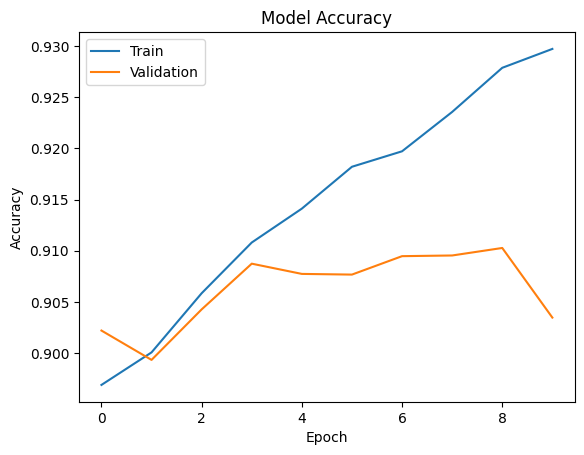

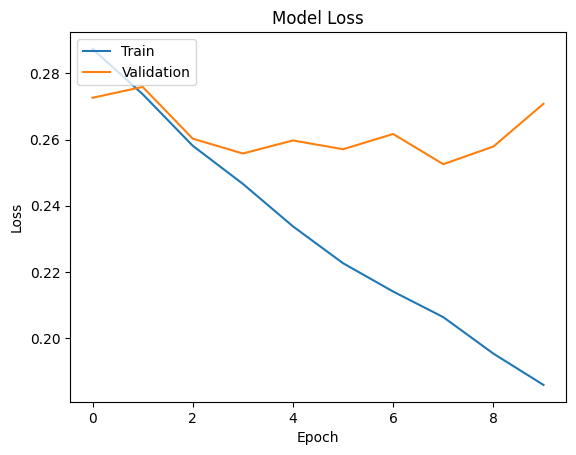

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
